# 선형회귀 심화
  - 경사하강법의 종류
  - 과대적합과 정규화
  - 사이킷런을 이용한 선형회귀

  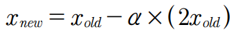

In [ ]:
# y= x**2
# y' = 2x



확률적 경사하강법 SGD
  - 장점
    - 업데이트가 빈번하게 이루어지기때문에 성능변화를 빠르게 확인
    - 데이터의 특성에 따라서 훨신 더 빠르게 결과값을 냄
    - 지역 최적화를 회피
  - 단점
    - 대용량 데이터인경우에 시간이 오래걸린다
    - 흔히 튀는현상이 발생해서 마지막에 결과 값을 확인하기 어려움


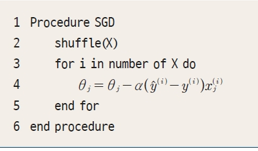

- 미니 배치 경사하강법
  - 데이터의 랜덤한 일부분만 입력해서 경사도 평균을 구함
- 에포크
    - 데이터를 한번에 학습시키는 횟수
      - ex : 전체데이터를 학습에 투입한다고 하면. 학습한번이 1 epoch
        - 미니배치의 배치크기가 20개씩이라면.(전체 100) 20개씩 학습을 5번해야 전체 데이터를 다 학습하고 이것이 1 epoch
        


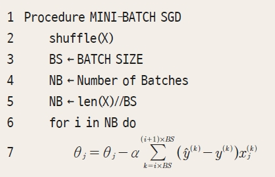

In [ ]:
import numpy as np

class LinearRegressionGD(object):
  def __init__(self, fit_intercept=True,copy_X=True, eta0=0.001, epochs=1000, batch_size=1, weight_decay=0.9,shuffle=True):
    self.fit_intercept = fit_intercept
    self.copy_X = copy_X
    self._eta0 = eta0         # 학습률(learning rate)
    self._epochs = epochs     # 전체 데이터에 대한 반복 횟수
    self._batch_size = batch_size  # 배치 크기
    self._weight_decay = weight_decay  # 가중치 감소 매 반복할때마가 학습률을 이 값으로 감소시킨다
    self._cost_history=[]
    self._coef = None
    self._intercept = None
    self._w_history = None
    self._new_X = None
    self._is_SGD = shuffle

  # 기울기 계산
  def gradient(self, X, y, theta):  # theta는 가중치
    return X.T.dot(self.hypothesis_function(X, theta) - y) / len(x)

  # 모델 학습
  def fit(self, X, y):
    self._new_X = np.array(X)  # 데이터 할당
    y = y.reshape(-1, 1)
    if self.fit_intercept:
      pass
    # 가중치 초기화
    theta_init = np.random.normal(0,1, self._new_X.shape[1])
    self._w_history = [theta_init]
    self._cost_history = [
        self.cost(self.hypothesis_function(self._new_X, theta_init), y)
    ]





In [1]:
# dot과 기울기
import numpy as np
x = np.array([[1,2],[3,4],[5,6]])  # 3,2 형태의 입력데이터
theta = np.array([0.5,1.5])
# 예측값
y_pred = x.dot(theta)
print(y_pred)

[ 3.5  7.5 11.5]


SGD(Stochastic Gradient Descent)
  - 전체데이터를 사용하는 것이 아니라 무작위로 선택된 작은 배치(미니배치)를 사용해서 파라미터를 업데이트

In [2]:
import numpy as np

In [ ]:
# 손실함수와 기울기 정의
# 손실함수 f(x) = (w-3)**2
# 기울기 : 2(w-3)

In [53]:
def loss_function(w):
  return (w-3)**2
def gradient(w):
  return 2*(w-3)

In [97]:
# SGD 함수 구현
def sgd(learning_rate=0.01, num_iterations=200):  # 학습률, 학습횟수
  # 초기화
  # w = np.random.randint(100)
  w = 70
  print(w)
  w_history = [w]
  for i in range(num_iterations):
    grad = gradient(w)  # 현재 파라메터에 대한 기울기 계산
    w -= learning_rate * grad  # 파라메터 업데이트
    w_history.append(w)  # 업데이트된 파라메터 저장
    if i % 10 == 0: # 매 10회 마다 손실 출력
      print(f"Iteration {i}: w = {w:.4f}, loss = {loss_function(w):.4f}")
  return w, w_history

In [106]:
final_w, w_history = sgd(learning_rate=0.01, num_iterations=200)

70
Iteration 0: w = 68.6600, loss = 4311.2356
Iteration 10: w = 56.6490, loss = 2878.2153
Iteration 20: w = 46.8351, loss = 1921.5194
Iteration 30: w = 38.8165, loss = 1282.8217
Iteration 40: w = 32.2647, loss = 856.4220
Iteration 50: w = 26.9114, loss = 571.7542
Iteration 60: w = 22.5373, loss = 381.7076
Iteration 70: w = 18.9634, loss = 254.8311
Iteration 80: w = 16.0433, loss = 170.1272
Iteration 90: w = 13.6573, loss = 113.5783
Iteration 100: w = 11.7078, loss = 75.8258
Iteration 110: w = 10.1149, loss = 50.6219
Iteration 120: w = 8.8134, loss = 33.7956
Iteration 130: w = 7.7500, loss = 22.5622
Iteration 140: w = 6.8811, loss = 15.0627
Iteration 150: w = 6.1711, loss = 10.0560
Iteration 160: w = 5.5910, loss = 6.7135
Iteration 170: w = 5.1171, loss = 4.4820
Iteration 180: w = 4.7298, loss = 2.9922
Iteration 190: w = 4.4134, loss = 1.9976


손실함수 시각화

In [107]:
import matplotlib.pyplot as plt

In [108]:
w_values = np.linspace(-5, 10, 100)
loss_values = loss_function(w_values)

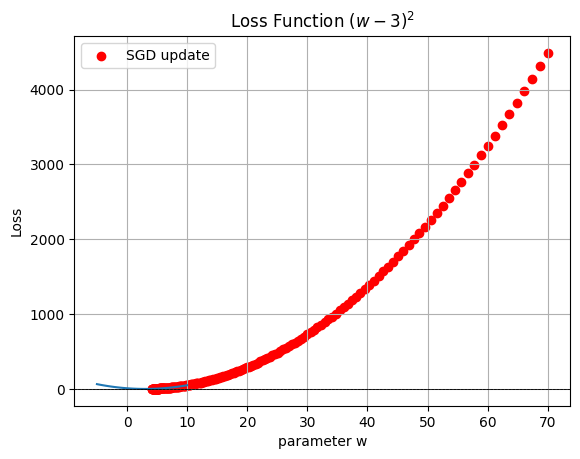

In [109]:
plt.scatter(w_history, [loss_function(w) for w in w_history], color='red', marker='o',label='SGD update')
plt.plot(w_values, loss_values)
plt.axhline(0, color='black', linewidth=0.5)
plt.axhline(3, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('parameter w')
plt.ylabel('Loss')
plt.title('Loss Function $(w - 3)^2$')
plt.grid(True)
plt.legend()
plt.show()